In [1]:
#!pip install newsapi-python

In [2]:
import pprint
import requests
from newsapi import NewsApiClient
import pandas as pd
import matplotlib.pyplot as plt
import datetime

In [3]:
### ACTION for later: Include shorter forms of names or nicknames? without then having articles double

In [4]:
k1_secret = '629525a47ff6458789d19a3c489419fa'

j1_secret = '40d4a2e1919c4066b59df69ca787f4ba'

j2_secret = '2211c202d86d46f78b48b3e532557d7d'
  
# Define the endpoint
url = 'https://newsapi.org/v2/everything'

# Get today's date
today = datetime.date.today()

# Get the timeperiod
two_years = (today - datetime.timedelta(days=365*2)).strftime('%Y-%m-%d') #strftime formats the datetime object as a string here in the YYYY-MM-DD
thirty_days = (today - datetime.timedelta(days=30)).strftime('%Y-%m-%d') 

In [9]:
#it*s for two years --> only possible with extended version

def plot_results_per_month(query):
    # Initialize the dictionary with the months as keys
    results_per_month = {}


    # Send a request for each month in the time range
    curr_month = datetime.date.today().replace(day=1)
    while curr_month >= datetime.date.fromisoformat(two_years):
        month_str = curr_month.strftime('%Y-%m')
        parameters = {
            'q': query,
            'pageSize': 100,
            'apiKey': j2_secret,
            'sortBy': 'publishedAt',
            'from': f'{month_str}-{curr_month.day}',
            'to': f'{month_str}-01' #maybe cause for problems? switch from and to??
        }
        response = requests.get(url, params=parameters)
        response_json = response.json()
        print(response_json)
        results_per_month[month_str] = response_json['totalResults']

    # Go back one month
        curr_month = curr_month - datetime.timedelta(days=1)
        curr_month = curr_month.replace(day=1)

    # Calculate the total number of results
    total_results = sum(results_per_month.values())

    # Calculate the percentage of results for each month
    results_percentages = {k: v / total_results * 100 for k, v in results_per_month.items()}

    # Plot the results
    months = list(results_per_month.keys())
    results = list(results_per_month.values())
    percentages = [f'{v:.1f}%' for v in results_percentages.values()]

    fig, ax = plt.subplots()

    ax.bar(months, results)
    ax.set_title(f'Number of results per month for "{query}"')
    ax.set_xlabel('Month')
    ax.set_ylabel('Number of results')
    for i, v in enumerate(results):
        ax.text(i, v, percentages[i], ha='center', va='bottom')

    plt.show()

In [10]:
# ACTION for the user: insert the parameters names for the players you want to analyse
plot_results_per_month('Mitchel Bakker')

{'status': 'ok', 'totalResults': 4, 'articles': [{'source': {'id': None, 'name': 'Www.nu.nl'}, 'author': 'onze sportredactie', 'title': 'Tuchel debuteert bij Bayern met overtuigende zege op titelconcurrent Dortmund', 'description': "Bayern München heeft zaterdag bij het debuut van trainer Thomas Tuchel op simpele wijze afgerekend met titelrivaal Borussia Dortmund: 4-2. Door de overwinning neemt 'Der Rekordmeister' de koppositie in de Bundesliga over van Dortmund.", 'url': 'https://www.nu.nl/voetbal/6257791/tuchel-debuteert-bij-bayern-met-overtuigende-zege-op-titelconcurrent-dortmund.html', 'urlToImage': 'https://media.nu.nl/m/9dkx2pbab7vk_wd1280/tuchel-debuteert-bij-bayern-met-overtuigende-zege-op-titelconcurrent-dortmund.jpg', 'publishedAt': '2023-04-01T18:36:25Z', 'content': '01 apr 2023 om 17:29Update: 4 minuten geleden\r\nBayern München heeft zaterdag bij het debuut van trainer Thomas Tuchel op simpele wijze afgerekend met titelrivaal Borussia Dortmund: 4-2. Door de overw… [+2214 c

KeyError: 'totalResults'

In [ ]:
def plot_results_per_day(query):
    results_per_day = {}
    
    # Send a request for each day in the time range
    curr_day = today
    while curr_day >= datetime.date.fromisoformat(thirty_days):
        day_str = curr_day.strftime('%Y-%m-%d')
        parameters = {
            'q': query,
            'pageSize': 100,
            'apiKey': j1_secret,
            'sortBy': 'publishedAt',
            'from': day_str,
            'to': day_str,
        }
        response = requests.get(url, params=parameters)
        response_json = response.json()
        #print(response_json)
        results_per_day[day_str] = response_json['totalResults']
        curr_day = curr_day - datetime.timedelta(days=1)

    # Calculate the total number of results
    total_results = sum(results_per_day.values())

    # Plot the results
    days = list(results_per_day.keys())
    results = list(results_per_day.values())

    fig, ax = plt.subplots()

    ax.bar(days, results)
    ax.set_title(f'Number of results per day for "{query}"')
    ax.set_xlabel('Day')
    ax.set_ylabel('Number of results')

    plt.show()

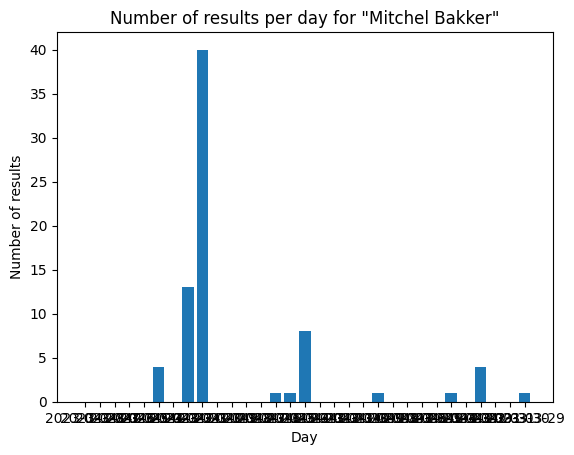

In [ ]:
# ACTION for the user: insert the parameters names for the players you want to analyse
plot_results_per_day('Mitchel Bakker')

# Perspective task 
Compare with matchdays